### Importing dependencies:-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE


C:\Users\avina\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading Train-Test Data and Submission Data

In [2]:
train_data = pd.read_csv(r'C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\train_s3TEQDk.csv')
test_data = pd.read_csv(r'C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\test_mSzZ8RL.csv')
ss = pd.read_csv(r'C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\sample_submission_eyYijxG.csv')

In [3]:
df = pd.concat([train_data, test_data], axis=0).reset_index(drop = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  object 
 2   Age                  351037 non-null  int64  
 3   Region_Code          351037 non-null  object 
 4   Occupation           351037 non-null  object 
 5   Channel_Code         351037 non-null  object 
 6   Vintage              351037 non-null  int64  
 7   Credit_Product       309190 non-null  object 
 8   Avg_Account_Balance  351037 non-null  int64  
 9   Is_Active            351037 non-null  object 
 10  Is_Lead              245725 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 29.5+ MB


In [5]:
train_rows = train_data.shape[0]
test_rows = test_data.shape[0]
print(train_rows,test_rows)

245725 105312


In [6]:
# train = df[:train_rows].reset_index(drop = True)
# test = df[train_rows:].reset_index(drop = True)

In [7]:
for features in df.columns:
    print(f"{features}:{df[features].nunique()}")
    

ID:351037
Gender:2
Age:63
Region_Code:35
Occupation:4
Channel_Code:4
Vintage:66
Credit_Product:2
Avg_Account_Balance:162137
Is_Active:2
Is_Lead:2


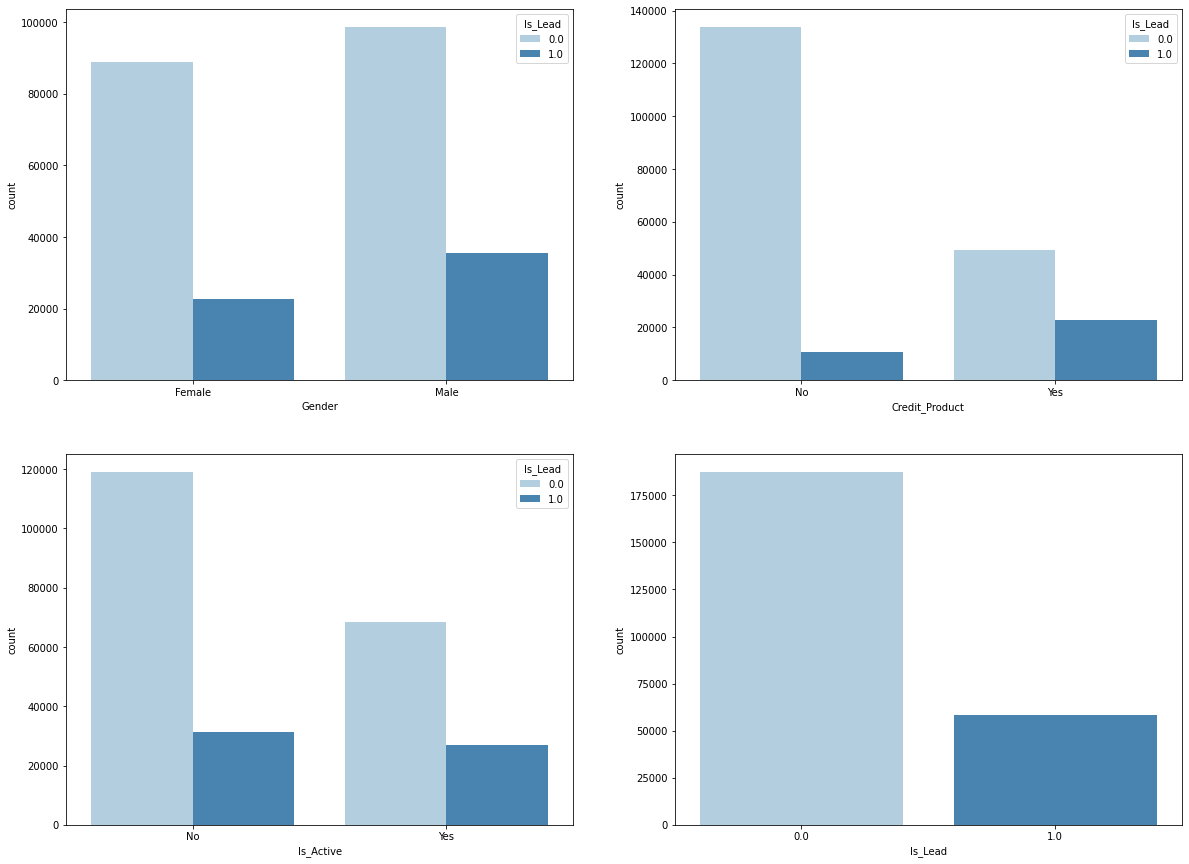

In [8]:
#visualizing the binary features
plt.figure(figsize =(20,15))
plt.subplot(2,2,1)
#sns.countplot(df_train['Gender'])
sns.countplot(x="Gender", hue="Is_Lead", data=df, palette="Blues")

plt.subplot(2,2,2)
#sns.countplot(df_train['Credit_Product'])
sns.countplot(x="Credit_Product", hue="Is_Lead", data=df, palette="Blues")

plt.subplot(2,2,3)
#sns.countplot(df_train['Is_Active'])
sns.countplot(x="Is_Active", hue="Is_Lead", data=df, palette="Blues")

plt.subplot(2,2,4)
sns.countplot(df['Is_Lead'],palette="Blues")

In [9]:
df['Occupation'].value_counts()

Self_Employed    144078
Salaried         102912
Other            100304
Entrepreneur       3743
Name: Occupation, dtype: int64

In [10]:
df['Channel_Code'].value_counts()

X1    148202
X3     97981
X2     96902
X4      7952
Name: Channel_Code, dtype: int64

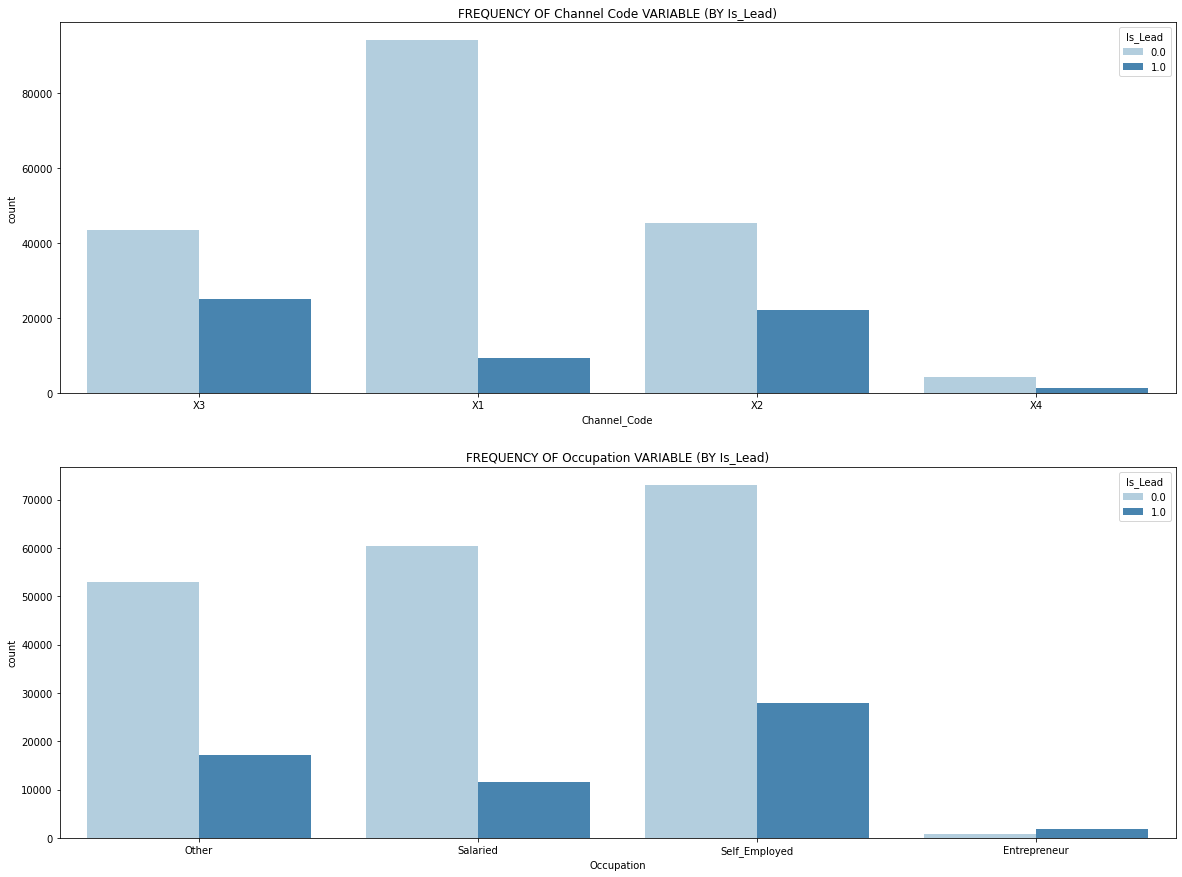

In [11]:
f, axes = plt.subplots(2, 1, figsize=(20, 15), facecolor='white')

#ax1 = sns.countplot(x="Region_Code", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[0,0])
ax1 = sns.countplot(x="Channel_Code", hue="Is_Lead", data=df, palette="Blues", ax=axes[0])
ax1.title.set_text('FREQUENCY OF Channel Code VARIABLE (BY Is_Lead)')
ax2 = sns.countplot(x="Occupation", hue="Is_Lead", data=df, palette="Blues", ax=axes[1])
ax2.title.set_text('FREQUENCY OF Occupation VARIABLE (BY Is_Lead)')

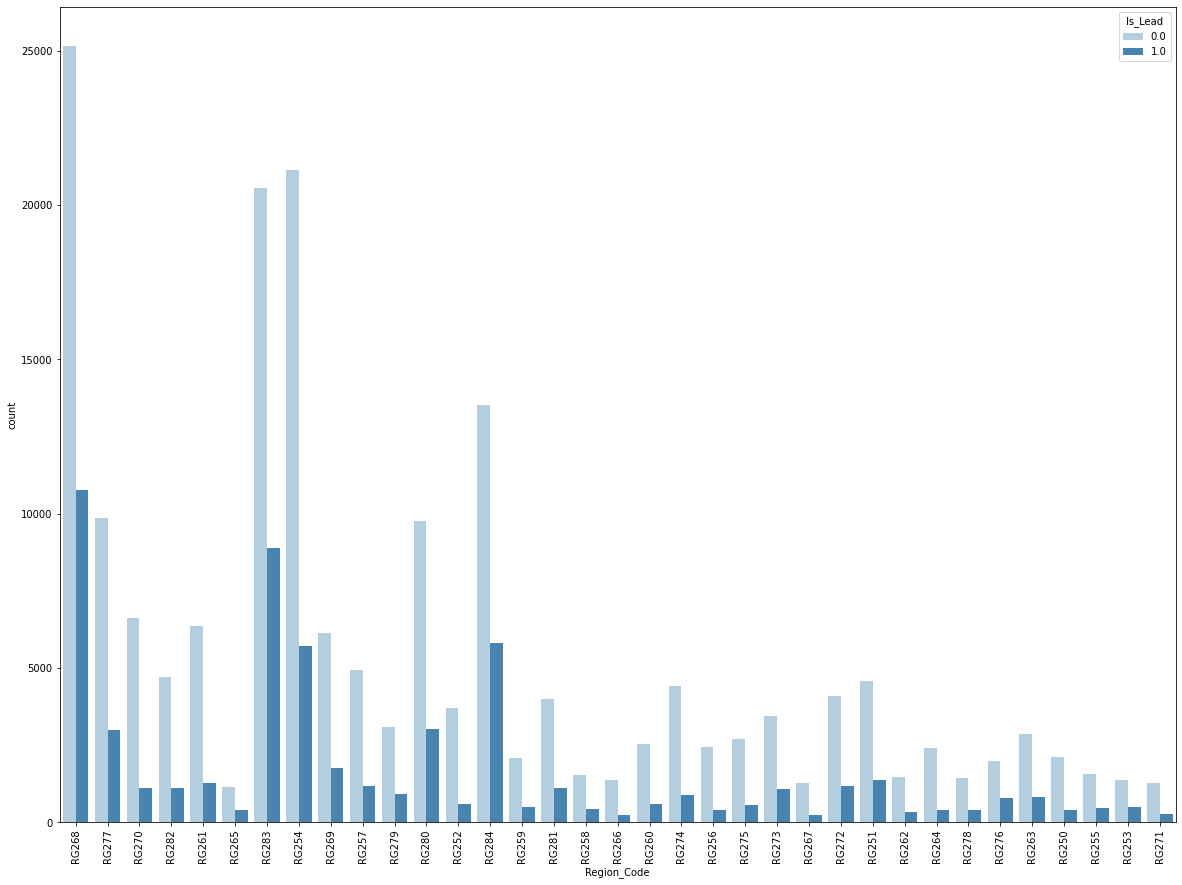

In [12]:
plt.figure(figsize =(20,15))
plt.xticks(rotation=90)
ax1 = sns.countplot(x="Region_Code", hue="Is_Lead", data=df, palette="Blues")

In [13]:
yeah = df['Is_Lead'].value_counts()
no = yeah[0]
yes = yeah[1]
print(yes,no)

yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)
print(yes_perc,no_perc)

58288 187437
16.6 53.4


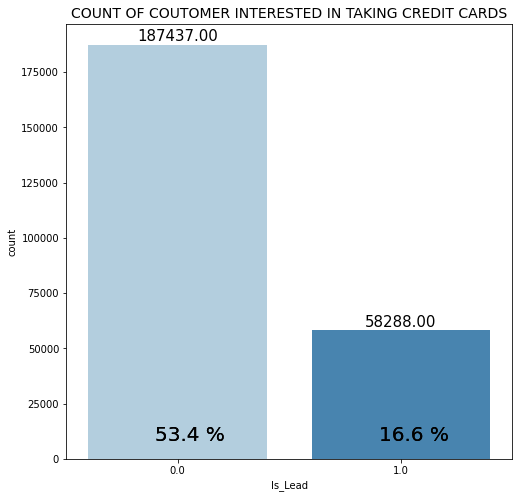

In [14]:
# Defining the plot size
plt.figure(figsize=(8, 8))

  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.countplot('Is_Lead',data=df, palette="Blues")
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plots.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=20)
    plots.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=20)
  

  
# Setting the title for the graph
plt.title('COUNT OF COUTOMER INTERESTED IN TAKING CREDIT CARDS', size=14)
  
# Fianlly showing the plot
plt.show()

In [15]:
df['Is_Lead'].value_counts()

0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64

In [16]:
df.groupby('Credit_Product')['Is_Lead'].sum()

Credit_Product
No     10623.0
Yes    22690.0
Name: Is_Lead, dtype: float64

In [17]:
# Univariate Analysis on Credit_Score
yes_perc = np.round((df['Credit_Product'].value_counts()[1]/len(df))*100,1)
no_perc = np.round((df['Credit_Product'].value_counts()[0]/len(df))*100,1)
yes_perc_Islead = np.round((df.groupby('Credit_Product')['Is_Lead'].sum()[1]/(df['Is_Lead'].value_counts()[1]))*100,1)
no_perc_Islead = np.round((df.groupby('Credit_Product')['Is_Lead'].sum()[0]/(df['Is_Lead'].value_counts()[1]))*100,1)

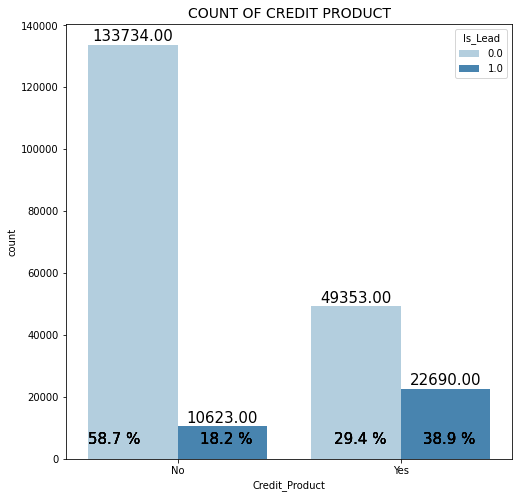

In [18]:
plt.figure(figsize=(8,8))

  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.countplot('Credit_Product',hue = 'Is_Lead',data=df, palette="Blues")
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plots.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.4, 5000), size=15)
    plots.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.7, 5000), size=15)
    plots.annotate(str(no_perc_Islead)+" %", xy=(-0.3, 15000), xytext=(0.1, 5000), size=15)
    plots.annotate(str(yes_perc_Islead)+" %", xy=(0.7, 15000), xytext=(1.1, 5000), size=15)
  

  
# Setting the title for the graph
plt.title('COUNT OF CREDIT PRODUCT', size=14)
  
# Fianlly showing the plot
plt.show()

In [19]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0


### Feature Engineering:-

In [20]:
#Feature with Occupation & Avg_Account_Balance
df['Occupationwise_acc_balance'] = df.groupby('Occupation')['Avg_Account_Balance'].transform('mean')
#Feature with Gender & Avg_Account_Balance
df['Genderwise_acc_balance'] = df.groupby('Gender')['Avg_Account_Balance'].transform('mean')
#Feature with Is_Active & Avg_Account_Balance
df['Isactivewise_acc_balance'] = df.groupby('Is_Active')['Avg_Account_Balance'].transform('mean')

In [21]:
#Feature with Age and Gender
df['gender_avg_age'] = df.groupby('Gender')['Age'].transform('mean')

In [22]:
#feature with gender and channel_code
df['gender_and_channelcode'] = df['Gender'].astype('str') + df['Channel_Code'].astype('str')
#feature with gender and Occupation
df['gender_and_occupation'] = df['Gender'].astype('str') + df['Occupation'].astype('str')
#feature with gender and Is_Active
df['gender_and_active'] = df['Gender'].astype('str') + df['Is_Active'].astype('str')

In [23]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupationwise_acc_balance,Genderwise_acc_balance,Isactivewise_acc_balance,gender_avg_age,gender_and_channelcode,gender_and_occupation,gender_and_active
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,1.211035e+06,1.108037e+06,1.078116e+06,41.389518,FemaleX3,FemaleOther,FemaleNo
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,1.036457e+06,1.108037e+06,1.078116e+06,41.389518,FemaleX1,FemaleSalaried,FemaleNo
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,1.133055e+06,1.108037e+06,1.211468e+06,41.389518,FemaleX3,FemaleSelf_Employed,FemaleYes
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,1.036457e+06,1.148470e+06,1.078116e+06,45.909959,MaleX1,MaleSalaried,MaleNo
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,1.036457e+06,1.108037e+06,1.078116e+06,41.389518,FemaleX1,FemaleSalaried,FemaleNo


In [24]:
cat_col = [f for f in df.columns if df[f].dtypes=='object' and f!='ID']

In [25]:
from category_encoders import CountEncoder
#Applying feature encoding
ce = CountEncoder()
count_encoded = ce.fit_transform(df[cat_col])
df = df.join(count_encoded.add_suffix("_count"))
df.drop(cat_col,axis=1,inplace=True)

In [26]:
df.head()

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Occupationwise_acc_balance,Genderwise_acc_balance,Isactivewise_acc_balance,gender_avg_age,Gender_count,Region_Code_count,Occupation_count,Channel_Code_count,Credit_Product_count,Is_Active_count,gender_and_channelcode_count,gender_and_occupation_count,gender_and_active_count
0,NNVBBKZB,73,43,1045696,0.0,1.211035e+06,1.108037e+06,1.078116e+06,41.389518,159135,51059,100304,97981,205965,214087,38093,43406,102649
1,IDD62UNG,30,32,581988,0.0,1.036457e+06,1.108037e+06,1.078116e+06,41.389518,159135,18422,102912,148202,205965,214087,83061,56378,102649
2,HD3DSEMC,56,26,1484315,0.0,1.133055e+06,1.108037e+06,1.211468e+06,41.389518,159135,51059,144078,97981,205965,136950,38093,58002,56486
3,BF3NC7KV,34,19,470454,0.0,1.036457e+06,1.148470e+06,1.078116e+06,45.909959,191902,11160,102912,148202,205965,214087,65141,46534,111438
4,TEASRWXV,30,33,886787,0.0,1.036457e+06,1.108037e+06,1.078116e+06,41.389518,159135,8166,102912,148202,205965,214087,83061,56378,102649


In [27]:
num_col = [f for f in df.columns if f not in cat_col and f!='ID']

In [28]:
# #scaling the datset
# scaler = StandardScaler()
# scaled = scaler.fit_transform(df[num_col])
# df[num_col] = scaled
# df[num_col]

In [29]:
print(df['Occupationwise_acc_balance'].value_counts())
print(df['Genderwise_acc_balance'].value_counts())
print(df['Isactivewise_acc_balance'].value_counts())
print(df['gender_avg_age'].value_counts())

1.133055e+06    144078
1.036457e+06    102912
1.211035e+06    100304
1.425952e+06      3743
Name: Occupationwise_acc_balance, dtype: int64
1.148470e+06    191902
1.108037e+06    159135
Name: Genderwise_acc_balance, dtype: int64
1.078116e+06    214087
1.211468e+06    136950
Name: Isactivewise_acc_balance, dtype: int64
45.909959    191902
41.389518    159135
Name: gender_avg_age, dtype: int64


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[num_col])
df[num_col] = scaled
df

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Occupationwise_acc_balance,Genderwise_acc_balance,Isactivewise_acc_balance,gender_avg_age,Gender_count,Region_Code_count,Occupation_count,Channel_Code_count,Credit_Product_count,Is_Active_count,gender_and_channelcode_count,gender_and_occupation_count,gender_and_active_count
0,NNVBBKZB,0.806452,0.281250,0.099205,0.0,0.448217,0.0,0.0,0.0,0.0,1.000000,0.688075,0.641918,1.000000,1.0,0.437795,0.496382,0.840060
1,IDD62UNG,0.112903,0.195312,0.054321,0.0,0.000000,0.0,0.0,0.0,0.0,0.333531,0.706659,1.000000,1.000000,1.0,1.000000,0.649486,0.840060
2,HD3DSEMC,0.532258,0.148438,0.141660,0.0,0.248007,0.0,1.0,0.0,0.0,1.000000,1.000000,0.641918,1.000000,0.0,0.437795,0.668653,0.000000
3,BF3NC7KV,0.177419,0.093750,0.043525,0.0,0.000000,1.0,0.0,1.0,1.0,0.185236,0.706659,1.000000,1.000000,1.0,0.775958,0.533301,1.000000
4,TEASRWXV,0.112903,0.203125,0.083823,0.0,0.000000,0.0,0.0,0.0,0.0,0.124096,0.706659,1.000000,1.000000,1.0,1.000000,0.649486,0.840060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,0.467742,0.617188,0.408642,NaN,0.000000,1.0,1.0,1.0,1.0,1.000000,0.706659,0.634225,0.373987,0.0,0.736651,0.533301,0.436344
351033,CWQ72DWS,0.516129,0.617188,0.110187,NaN,0.448217,1.0,0.0,1.0,1.0,0.333531,0.688075,0.634225,0.373987,1.0,0.736651,0.655623,1.000000
351034,HDESC8GU,0.193548,0.062500,0.162898,NaN,0.000000,1.0,0.0,1.0,1.0,0.745109,0.706659,0.000000,1.000000,1.0,0.022504,0.533301,1.000000
351035,2PW4SFCA,0.483871,0.671875,0.069342,NaN,0.448217,1.0,1.0,1.0,1.0,0.745109,0.688075,0.641918,1.000000,0.0,0.710283,0.655623,0.436344


In [31]:
train = df[:train_rows].reset_index(drop = True)
test = df[train_rows:].reset_index(drop = True)

In [32]:
print(train.shape,test.shape)

(245725, 18) (105312, 18)


In [33]:
test.drop(['Is_Lead','ID'],axis=1,inplace=True)
train.drop(['ID'],axis=1,inplace=True)

In [34]:
test.shape

(105312, 16)

In [35]:
y_train = train.pop('Is_Lead')
X_train = train

## Model Building:-

### CatBoost with cross validation

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
#catboost model training
clf = CatBoostClassifier(n_estimators = 3000,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                        )

grid = {'learning_rate': [0.2],
        'depth': [4, 6],
        'early_stopping_rounds' :[300],
       }

# grid_search_result = model.grid_search(grid, 
#                                        X=train_data, 
#                                        y=train_labels, 
#                                        plot=True)
grid_search = GridSearchCV(estimator= clf, param_grid = grid, cv = 5, n_jobs=-1, verbose=200,
                            scoring="roc_auc")

In [38]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to new file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to new file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-018d64aa7c6743f08fbf6314349f84c3.pkl
Pickling array (shape=(196580,), dtype=int32).
Pickling array (shape=(49145,), dtype=int32).
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245

33:	learn: 0.3461274	total: 2.04s	remaining: 2m 58s
34:	learn: 0.3460411	total: 2.1s	remaining: 2m 58s
35:	learn: 0.3458804	total: 2.15s	remaining: 2m 57s
36:	learn: 0.3457976	total: 2.21s	remaining: 2m 57s
37:	learn: 0.3457518	total: 2.26s	remaining: 2m 56s
38:	learn: 0.3456470	total: 2.32s	remaining: 2m 55s
39:	learn: 0.3456148	total: 2.37s	remaining: 2m 55s
40:	learn: 0.3455785	total: 2.42s	remaining: 2m 54s
41:	learn: 0.3455413	total: 2.48s	remaining: 2m 54s
42:	learn: 0.3452674	total: 2.53s	remaining: 2m 54s
43:	learn: 0.3452425	total: 2.6s	remaining: 2m 54s
44:	learn: 0.3452013	total: 2.65s	remaining: 2m 54s
45:	learn: 0.3450147	total: 2.71s	remaining: 2m 54s
46:	learn: 0.3449491	total: 2.76s	remaining: 2m 53s
47:	learn: 0.3448739	total: 2.81s	remaining: 2m 52s
48:	learn: 0.3448400	total: 2.86s	remaining: 2m 52s
49:	learn: 0.3447731	total: 2.91s	remaining: 2m 51s
50:	learn: 0.3447301	total: 2.96s	remaining: 2m 51s
51:	learn: 0.3446575	total: 3.02s	remaining: 2m 50s
52:	learn: 0.3

192:	learn: 0.3412180	total: 11s	remaining: 2m 39s
193:	learn: 0.3412055	total: 11s	remaining: 2m 39s
194:	learn: 0.3411958	total: 11.1s	remaining: 2m 39s
195:	learn: 0.3411898	total: 11.1s	remaining: 2m 39s
196:	learn: 0.3411777	total: 11.2s	remaining: 2m 39s
197:	learn: 0.3411628	total: 11.2s	remaining: 2m 39s
198:	learn: 0.3411514	total: 11.3s	remaining: 2m 39s
199:	learn: 0.3411346	total: 11.4s	remaining: 2m 39s
200:	learn: 0.3411137	total: 11.5s	remaining: 2m 39s
201:	learn: 0.3411045	total: 11.5s	remaining: 2m 39s
202:	learn: 0.3410945	total: 11.6s	remaining: 2m 39s
203:	learn: 0.3410790	total: 11.6s	remaining: 2m 39s
204:	learn: 0.3410611	total: 11.7s	remaining: 2m 39s
205:	learn: 0.3410476	total: 11.8s	remaining: 2m 39s
206:	learn: 0.3410342	total: 11.8s	remaining: 2m 39s
207:	learn: 0.3410228	total: 11.9s	remaining: 2m 39s
208:	learn: 0.3410047	total: 12s	remaining: 2m 39s
209:	learn: 0.3409909	total: 12s	remaining: 2m 39s
210:	learn: 0.3409778	total: 12.1s	remaining: 2m 39s
2

351:	learn: 0.3392601	total: 20.3s	remaining: 2m 32s
352:	learn: 0.3392444	total: 20.4s	remaining: 2m 32s
353:	learn: 0.3392336	total: 20.4s	remaining: 2m 32s
354:	learn: 0.3392170	total: 20.5s	remaining: 2m 32s
355:	learn: 0.3391977	total: 20.6s	remaining: 2m 32s
356:	learn: 0.3391912	total: 20.6s	remaining: 2m 32s
357:	learn: 0.3391834	total: 20.7s	remaining: 2m 32s
358:	learn: 0.3391721	total: 20.7s	remaining: 2m 32s
359:	learn: 0.3391648	total: 20.8s	remaining: 2m 32s
360:	learn: 0.3391572	total: 20.8s	remaining: 2m 32s
361:	learn: 0.3391466	total: 20.9s	remaining: 2m 32s
362:	learn: 0.3391408	total: 21s	remaining: 2m 32s
363:	learn: 0.3391309	total: 21s	remaining: 2m 32s
364:	learn: 0.3391213	total: 21.1s	remaining: 2m 32s
365:	learn: 0.3391062	total: 21.1s	remaining: 2m 32s
366:	learn: 0.3390881	total: 21.2s	remaining: 2m 31s
367:	learn: 0.3390807	total: 21.2s	remaining: 2m 31s
368:	learn: 0.3390689	total: 21.3s	remaining: 2m 31s
369:	learn: 0.3390544	total: 21.4s	remaining: 2m 3

510:	learn: 0.3376667	total: 29.3s	remaining: 2m 22s
511:	learn: 0.3376590	total: 29.4s	remaining: 2m 22s
512:	learn: 0.3376498	total: 29.5s	remaining: 2m 22s
513:	learn: 0.3376447	total: 29.5s	remaining: 2m 22s
514:	learn: 0.3376380	total: 29.6s	remaining: 2m 22s
515:	learn: 0.3376290	total: 29.6s	remaining: 2m 22s
516:	learn: 0.3376158	total: 29.7s	remaining: 2m 22s
517:	learn: 0.3376045	total: 29.7s	remaining: 2m 22s
518:	learn: 0.3375929	total: 29.8s	remaining: 2m 22s
519:	learn: 0.3375805	total: 29.8s	remaining: 2m 22s
520:	learn: 0.3375687	total: 29.9s	remaining: 2m 22s
521:	learn: 0.3375623	total: 30s	remaining: 2m 22s
522:	learn: 0.3375575	total: 30s	remaining: 2m 22s
523:	learn: 0.3375476	total: 30.1s	remaining: 2m 22s
524:	learn: 0.3375381	total: 30.1s	remaining: 2m 22s
525:	learn: 0.3375290	total: 30.2s	remaining: 2m 22s
526:	learn: 0.3375154	total: 30.3s	remaining: 2m 21s
527:	learn: 0.3375051	total: 30.3s	remaining: 2m 21s
528:	learn: 0.3374965	total: 30.4s	remaining: 2m 2

669:	learn: 0.3362133	total: 38s	remaining: 2m 12s
670:	learn: 0.3362083	total: 38.1s	remaining: 2m 12s
671:	learn: 0.3362068	total: 38.1s	remaining: 2m 12s
672:	learn: 0.3362005	total: 38.2s	remaining: 2m 12s
673:	learn: 0.3361947	total: 38.2s	remaining: 2m 11s
674:	learn: 0.3361869	total: 38.3s	remaining: 2m 11s
675:	learn: 0.3361750	total: 38.3s	remaining: 2m 11s
676:	learn: 0.3361655	total: 38.4s	remaining: 2m 11s
677:	learn: 0.3361570	total: 38.4s	remaining: 2m 11s
678:	learn: 0.3361477	total: 38.5s	remaining: 2m 11s
679:	learn: 0.3361397	total: 38.6s	remaining: 2m 11s
680:	learn: 0.3361308	total: 38.6s	remaining: 2m 11s
681:	learn: 0.3361202	total: 38.7s	remaining: 2m 11s
682:	learn: 0.3361135	total: 38.7s	remaining: 2m 11s
683:	learn: 0.3361029	total: 38.8s	remaining: 2m 11s
684:	learn: 0.3361005	total: 38.8s	remaining: 2m 11s
685:	learn: 0.3360945	total: 38.9s	remaining: 2m 11s
686:	learn: 0.3360866	total: 38.9s	remaining: 2m 11s
687:	learn: 0.3360767	total: 39s	remaining: 2m 1

831:	learn: 0.3349249	total: 46.9s	remaining: 2m 2s
832:	learn: 0.3349168	total: 46.9s	remaining: 2m 2s
833:	learn: 0.3349135	total: 47s	remaining: 2m 1s
834:	learn: 0.3349069	total: 47s	remaining: 2m 1s
835:	learn: 0.3349011	total: 47.1s	remaining: 2m 1s
836:	learn: 0.3348920	total: 47.1s	remaining: 2m 1s
837:	learn: 0.3348860	total: 47.2s	remaining: 2m 1s
838:	learn: 0.3348713	total: 47.3s	remaining: 2m 1s
839:	learn: 0.3348663	total: 47.3s	remaining: 2m 1s
840:	learn: 0.3348601	total: 47.4s	remaining: 2m 1s
841:	learn: 0.3348525	total: 47.4s	remaining: 2m 1s
842:	learn: 0.3348427	total: 47.5s	remaining: 2m 1s
843:	learn: 0.3348320	total: 47.5s	remaining: 2m 1s
844:	learn: 0.3348238	total: 47.6s	remaining: 2m 1s
845:	learn: 0.3348135	total: 47.6s	remaining: 2m 1s
846:	learn: 0.3348077	total: 47.7s	remaining: 2m 1s
847:	learn: 0.3347979	total: 47.7s	remaining: 2m 1s
848:	learn: 0.3347907	total: 47.8s	remaining: 2m 1s
849:	learn: 0.3347828	total: 47.8s	remaining: 2m 1s
850:	learn: 0.33

991:	learn: 0.3337142	total: 55.6s	remaining: 1m 52s
992:	learn: 0.3337087	total: 55.7s	remaining: 1m 52s
993:	learn: 0.3337056	total: 55.7s	remaining: 1m 52s
994:	learn: 0.3337001	total: 55.8s	remaining: 1m 52s
995:	learn: 0.3336903	total: 55.8s	remaining: 1m 52s
996:	learn: 0.3336820	total: 55.9s	remaining: 1m 52s
997:	learn: 0.3336775	total: 55.9s	remaining: 1m 52s
998:	learn: 0.3336688	total: 56s	remaining: 1m 52s
999:	learn: 0.3336620	total: 56s	remaining: 1m 52s
1000:	learn: 0.3336575	total: 56.1s	remaining: 1m 52s
1001:	learn: 0.3336517	total: 56.1s	remaining: 1m 51s
1002:	learn: 0.3336398	total: 56.2s	remaining: 1m 51s
1003:	learn: 0.3336308	total: 56.2s	remaining: 1m 51s
1004:	learn: 0.3336238	total: 56.3s	remaining: 1m 51s
1005:	learn: 0.3336153	total: 56.3s	remaining: 1m 51s
1006:	learn: 0.3336052	total: 56.4s	remaining: 1m 51s
1007:	learn: 0.3335993	total: 56.4s	remaining: 1m 51s
1008:	learn: 0.3335924	total: 56.5s	remaining: 1m 51s
1009:	learn: 0.3335867	total: 56.6s	remai

1148:	learn: 0.3325864	total: 1m 4s	remaining: 1m 43s
1149:	learn: 0.3325767	total: 1m 4s	remaining: 1m 43s
1150:	learn: 0.3325634	total: 1m 4s	remaining: 1m 43s
1151:	learn: 0.3325548	total: 1m 4s	remaining: 1m 43s
1152:	learn: 0.3325454	total: 1m 4s	remaining: 1m 42s
1153:	learn: 0.3325413	total: 1m 4s	remaining: 1m 42s
1154:	learn: 0.3325342	total: 1m 4s	remaining: 1m 42s
1155:	learn: 0.3325313	total: 1m 4s	remaining: 1m 42s
1156:	learn: 0.3325276	total: 1m 4s	remaining: 1m 42s
1157:	learn: 0.3325224	total: 1m 4s	remaining: 1m 42s
1158:	learn: 0.3325140	total: 1m 4s	remaining: 1m 42s
1159:	learn: 0.3325043	total: 1m 4s	remaining: 1m 42s
1160:	learn: 0.3324963	total: 1m 4s	remaining: 1m 42s
1161:	learn: 0.3324868	total: 1m 4s	remaining: 1m 42s
1162:	learn: 0.3324836	total: 1m 4s	remaining: 1m 42s
1163:	learn: 0.3324749	total: 1m 4s	remaining: 1m 42s
1164:	learn: 0.3324652	total: 1m 4s	remaining: 1m 42s
1165:	learn: 0.3324601	total: 1m 5s	remaining: 1m 42s
1166:	learn: 0.3324524	total

1300:	learn: 0.3315262	total: 1m 12s	remaining: 1m 34s
1301:	learn: 0.3315171	total: 1m 12s	remaining: 1m 34s
1302:	learn: 0.3315128	total: 1m 12s	remaining: 1m 34s
1303:	learn: 0.3315078	total: 1m 12s	remaining: 1m 34s
1304:	learn: 0.3315017	total: 1m 12s	remaining: 1m 34s
1305:	learn: 0.3314991	total: 1m 12s	remaining: 1m 34s
1306:	learn: 0.3314913	total: 1m 12s	remaining: 1m 34s
1307:	learn: 0.3314827	total: 1m 12s	remaining: 1m 34s
1308:	learn: 0.3314765	total: 1m 12s	remaining: 1m 34s
1309:	learn: 0.3314711	total: 1m 12s	remaining: 1m 34s
1310:	learn: 0.3314495	total: 1m 12s	remaining: 1m 33s
1311:	learn: 0.3314424	total: 1m 12s	remaining: 1m 33s
1312:	learn: 0.3314414	total: 1m 13s	remaining: 1m 33s
1313:	learn: 0.3314357	total: 1m 13s	remaining: 1m 33s
1314:	learn: 0.3314309	total: 1m 13s	remaining: 1m 33s
1315:	learn: 0.3314224	total: 1m 13s	remaining: 1m 33s
1316:	learn: 0.3314157	total: 1m 13s	remaining: 1m 33s
1317:	learn: 0.3314085	total: 1m 13s	remaining: 1m 33s
1318:	lear

1452:	learn: 0.3305218	total: 1m 20s	remaining: 1m 25s
1453:	learn: 0.3305142	total: 1m 20s	remaining: 1m 25s
1454:	learn: 0.3305076	total: 1m 20s	remaining: 1m 25s
1455:	learn: 0.3305041	total: 1m 20s	remaining: 1m 25s
1456:	learn: 0.3304972	total: 1m 20s	remaining: 1m 25s
1457:	learn: 0.3304877	total: 1m 20s	remaining: 1m 25s
1458:	learn: 0.3304787	total: 1m 20s	remaining: 1m 25s
1459:	learn: 0.3304723	total: 1m 21s	remaining: 1m 25s
1460:	learn: 0.3304626	total: 1m 21s	remaining: 1m 25s
1461:	learn: 0.3304587	total: 1m 21s	remaining: 1m 25s
1462:	learn: 0.3304538	total: 1m 21s	remaining: 1m 25s
1463:	learn: 0.3304495	total: 1m 21s	remaining: 1m 25s
1464:	learn: 0.3304419	total: 1m 21s	remaining: 1m 25s
1465:	learn: 0.3304371	total: 1m 21s	remaining: 1m 25s
1466:	learn: 0.3304319	total: 1m 21s	remaining: 1m 25s
1467:	learn: 0.3304270	total: 1m 21s	remaining: 1m 25s
1468:	learn: 0.3304217	total: 1m 21s	remaining: 1m 25s
1469:	learn: 0.3304145	total: 1m 21s	remaining: 1m 24s
1470:	lear

1601:	learn: 0.3295779	total: 1m 29s	remaining: 1m 17s
1602:	learn: 0.3295719	total: 1m 29s	remaining: 1m 17s
1603:	learn: 0.3295640	total: 1m 29s	remaining: 1m 17s
1604:	learn: 0.3295610	total: 1m 29s	remaining: 1m 17s
1605:	learn: 0.3295545	total: 1m 29s	remaining: 1m 17s
1606:	learn: 0.3295456	total: 1m 29s	remaining: 1m 17s
1607:	learn: 0.3295396	total: 1m 29s	remaining: 1m 17s
1608:	learn: 0.3295326	total: 1m 29s	remaining: 1m 17s
1609:	learn: 0.3295258	total: 1m 29s	remaining: 1m 17s
1610:	learn: 0.3295183	total: 1m 29s	remaining: 1m 17s
1611:	learn: 0.3295139	total: 1m 29s	remaining: 1m 17s
1612:	learn: 0.3295084	total: 1m 29s	remaining: 1m 17s
1613:	learn: 0.3295054	total: 1m 29s	remaining: 1m 17s
1614:	learn: 0.3294998	total: 1m 29s	remaining: 1m 16s
1615:	learn: 0.3294963	total: 1m 29s	remaining: 1m 16s
1616:	learn: 0.3294904	total: 1m 29s	remaining: 1m 16s
1617:	learn: 0.3294844	total: 1m 29s	remaining: 1m 16s
1618:	learn: 0.3294771	total: 1m 30s	remaining: 1m 16s
1619:	lear

1752:	learn: 0.3286818	total: 1m 37s	remaining: 1m 9s
1753:	learn: 0.3286803	total: 1m 37s	remaining: 1m 9s
1754:	learn: 0.3286715	total: 1m 37s	remaining: 1m 9s
1755:	learn: 0.3286647	total: 1m 37s	remaining: 1m 9s
1756:	learn: 0.3286604	total: 1m 37s	remaining: 1m 9s
1757:	learn: 0.3286522	total: 1m 37s	remaining: 1m 9s
1758:	learn: 0.3286505	total: 1m 37s	remaining: 1m 9s
1759:	learn: 0.3286455	total: 1m 37s	remaining: 1m 8s
1760:	learn: 0.3286393	total: 1m 37s	remaining: 1m 8s
1761:	learn: 0.3286345	total: 1m 37s	remaining: 1m 8s
1762:	learn: 0.3286295	total: 1m 38s	remaining: 1m 8s
1763:	learn: 0.3286256	total: 1m 38s	remaining: 1m 8s
1764:	learn: 0.3286188	total: 1m 38s	remaining: 1m 8s
1765:	learn: 0.3286137	total: 1m 38s	remaining: 1m 8s
1766:	learn: 0.3286076	total: 1m 38s	remaining: 1m 8s
1767:	learn: 0.3286053	total: 1m 38s	remaining: 1m 8s
1768:	learn: 0.3285981	total: 1m 38s	remaining: 1m 8s
1769:	learn: 0.3285915	total: 1m 38s	remaining: 1m 8s
1770:	learn: 0.3285878	total

1905:	learn: 0.3277989	total: 1m 45s	remaining: 1m
1906:	learn: 0.3277931	total: 1m 45s	remaining: 1m
1907:	learn: 0.3277884	total: 1m 45s	remaining: 1m
1908:	learn: 0.3277855	total: 1m 45s	remaining: 1m
1909:	learn: 0.3277802	total: 1m 46s	remaining: 1m
1910:	learn: 0.3277780	total: 1m 46s	remaining: 1m
1911:	learn: 0.3277751	total: 1m 46s	remaining: 1m
1912:	learn: 0.3277687	total: 1m 46s	remaining: 1m
1913:	learn: 0.3277613	total: 1m 46s	remaining: 1m
1914:	learn: 0.3277554	total: 1m 46s	remaining: 1m
1915:	learn: 0.3277535	total: 1m 46s	remaining: 1m
1916:	learn: 0.3277473	total: 1m 46s	remaining: 1m
1917:	learn: 0.3277439	total: 1m 46s	remaining: 1m
1918:	learn: 0.3277376	total: 1m 46s	remaining: 60s
1919:	learn: 0.3277306	total: 1m 46s	remaining: 59.9s
1920:	learn: 0.3277253	total: 1m 46s	remaining: 59.9s
1921:	learn: 0.3277218	total: 1m 46s	remaining: 59.8s
1922:	learn: 0.3277129	total: 1m 46s	remaining: 59.8s
1923:	learn: 0.3277093	total: 1m 46s	remaining: 59.7s
1924:	learn: 0.

2062:	learn: 0.3269463	total: 1m 54s	remaining: 51.9s
2063:	learn: 0.3269349	total: 1m 54s	remaining: 51.8s
2064:	learn: 0.3269302	total: 1m 54s	remaining: 51.8s
2065:	learn: 0.3269259	total: 1m 54s	remaining: 51.7s
2066:	learn: 0.3269227	total: 1m 54s	remaining: 51.7s
2067:	learn: 0.3269163	total: 1m 54s	remaining: 51.6s
2068:	learn: 0.3269129	total: 1m 54s	remaining: 51.6s
2069:	learn: 0.3269053	total: 1m 54s	remaining: 51.5s
2070:	learn: 0.3269004	total: 1m 54s	remaining: 51.5s
2071:	learn: 0.3268934	total: 1m 54s	remaining: 51.4s
2072:	learn: 0.3268858	total: 1m 54s	remaining: 51.3s
2073:	learn: 0.3268788	total: 1m 54s	remaining: 51.3s
2074:	learn: 0.3268682	total: 1m 54s	remaining: 51.2s
2075:	learn: 0.3268628	total: 1m 54s	remaining: 51.2s
2076:	learn: 0.3268565	total: 1m 55s	remaining: 51.1s
2077:	learn: 0.3268456	total: 1m 55s	remaining: 51.1s
2078:	learn: 0.3268366	total: 1m 55s	remaining: 51s
2079:	learn: 0.3268290	total: 1m 55s	remaining: 50.9s
2080:	learn: 0.3268245	total: 

2218:	learn: 0.3260216	total: 2m 4s	remaining: 43.7s
2219:	learn: 0.3260169	total: 2m 4s	remaining: 43.6s
2220:	learn: 0.3260103	total: 2m 4s	remaining: 43.6s
2221:	learn: 0.3260037	total: 2m 4s	remaining: 43.5s
2222:	learn: 0.3259994	total: 2m 4s	remaining: 43.5s
2223:	learn: 0.3259947	total: 2m 4s	remaining: 43.4s
2224:	learn: 0.3259854	total: 2m 4s	remaining: 43.4s
2225:	learn: 0.3259782	total: 2m 4s	remaining: 43.3s
2226:	learn: 0.3259722	total: 2m 4s	remaining: 43.3s
2227:	learn: 0.3259619	total: 2m 4s	remaining: 43.2s
2228:	learn: 0.3259592	total: 2m 4s	remaining: 43.1s
2229:	learn: 0.3259470	total: 2m 4s	remaining: 43.1s
2230:	learn: 0.3259424	total: 2m 4s	remaining: 43s
2231:	learn: 0.3259369	total: 2m 4s	remaining: 43s
2232:	learn: 0.3259346	total: 2m 4s	remaining: 42.9s
2233:	learn: 0.3259314	total: 2m 5s	remaining: 42.9s
2234:	learn: 0.3259242	total: 2m 5s	remaining: 42.8s
2235:	learn: 0.3259171	total: 2m 5s	remaining: 42.8s
2236:	learn: 0.3259132	total: 2m 5s	remaining: 42.

2376:	learn: 0.3251768	total: 2m 13s	remaining: 34.9s
2377:	learn: 0.3251688	total: 2m 13s	remaining: 34.9s
2378:	learn: 0.3251633	total: 2m 13s	remaining: 34.8s
2379:	learn: 0.3251570	total: 2m 13s	remaining: 34.8s
2380:	learn: 0.3251517	total: 2m 13s	remaining: 34.7s
2381:	learn: 0.3251474	total: 2m 13s	remaining: 34.6s
2382:	learn: 0.3251453	total: 2m 13s	remaining: 34.6s
2383:	learn: 0.3251408	total: 2m 13s	remaining: 34.5s
2384:	learn: 0.3251370	total: 2m 13s	remaining: 34.5s
2385:	learn: 0.3251350	total: 2m 13s	remaining: 34.4s
2386:	learn: 0.3251291	total: 2m 13s	remaining: 34.4s
2387:	learn: 0.3251262	total: 2m 13s	remaining: 34.3s
2388:	learn: 0.3251228	total: 2m 13s	remaining: 34.3s
2389:	learn: 0.3251176	total: 2m 14s	remaining: 34.2s
2390:	learn: 0.3251129	total: 2m 14s	remaining: 34.2s
2391:	learn: 0.3251045	total: 2m 14s	remaining: 34.1s
2392:	learn: 0.3250965	total: 2m 14s	remaining: 34s
2393:	learn: 0.3250922	total: 2m 14s	remaining: 34s
2394:	learn: 0.3250867	total: 2m

2530:	learn: 0.3243846	total: 2m 21s	remaining: 26.3s
2531:	learn: 0.3243776	total: 2m 21s	remaining: 26.2s
2532:	learn: 0.3243745	total: 2m 21s	remaining: 26.1s
2533:	learn: 0.3243668	total: 2m 21s	remaining: 26.1s
2534:	learn: 0.3243623	total: 2m 21s	remaining: 26s
2535:	learn: 0.3243573	total: 2m 21s	remaining: 26s
2536:	learn: 0.3243518	total: 2m 22s	remaining: 25.9s
2537:	learn: 0.3243414	total: 2m 22s	remaining: 25.9s
2538:	learn: 0.3243349	total: 2m 22s	remaining: 25.8s
2539:	learn: 0.3243322	total: 2m 22s	remaining: 25.8s
2540:	learn: 0.3243246	total: 2m 22s	remaining: 25.7s
2541:	learn: 0.3243222	total: 2m 22s	remaining: 25.6s
2542:	learn: 0.3243162	total: 2m 22s	remaining: 25.6s
2543:	learn: 0.3243115	total: 2m 22s	remaining: 25.5s
2544:	learn: 0.3243081	total: 2m 22s	remaining: 25.5s
2545:	learn: 0.3243020	total: 2m 22s	remaining: 25.4s
2546:	learn: 0.3242966	total: 2m 22s	remaining: 25.4s
2547:	learn: 0.3242904	total: 2m 22s	remaining: 25.3s
2548:	learn: 0.3242847	total: 2m

2684:	learn: 0.3236060	total: 2m 30s	remaining: 17.6s
2685:	learn: 0.3236027	total: 2m 30s	remaining: 17.6s
2686:	learn: 0.3235991	total: 2m 30s	remaining: 17.5s
2687:	learn: 0.3235943	total: 2m 30s	remaining: 17.5s
2688:	learn: 0.3235861	total: 2m 30s	remaining: 17.4s
2689:	learn: 0.3235813	total: 2m 30s	remaining: 17.4s
2690:	learn: 0.3235758	total: 2m 30s	remaining: 17.3s
2691:	learn: 0.3235728	total: 2m 30s	remaining: 17.3s
2692:	learn: 0.3235686	total: 2m 30s	remaining: 17.2s
2693:	learn: 0.3235629	total: 2m 30s	remaining: 17.1s
2694:	learn: 0.3235595	total: 2m 30s	remaining: 17.1s
2695:	learn: 0.3235517	total: 2m 30s	remaining: 17s
2696:	learn: 0.3235460	total: 2m 31s	remaining: 17s
2697:	learn: 0.3235402	total: 2m 31s	remaining: 16.9s
2698:	learn: 0.3235354	total: 2m 31s	remaining: 16.9s
2699:	learn: 0.3235294	total: 2m 31s	remaining: 16.8s
2700:	learn: 0.3235241	total: 2m 31s	remaining: 16.7s
2701:	learn: 0.3235194	total: 2m 31s	remaining: 16.7s
2702:	learn: 0.3235134	total: 2m

2838:	learn: 0.3228738	total: 2m 38s	remaining: 9.01s
2839:	learn: 0.3228679	total: 2m 38s	remaining: 8.95s
2840:	learn: 0.3228655	total: 2m 38s	remaining: 8.9s
2841:	learn: 0.3228602	total: 2m 39s	remaining: 8.84s
2842:	learn: 0.3228561	total: 2m 39s	remaining: 8.79s
2843:	learn: 0.3228489	total: 2m 39s	remaining: 8.73s
2844:	learn: 0.3228430	total: 2m 39s	remaining: 8.67s
2845:	learn: 0.3228389	total: 2m 39s	remaining: 8.62s
2846:	learn: 0.3228313	total: 2m 39s	remaining: 8.56s
2847:	learn: 0.3228284	total: 2m 39s	remaining: 8.51s
2848:	learn: 0.3228235	total: 2m 39s	remaining: 8.45s
2849:	learn: 0.3228199	total: 2m 39s	remaining: 8.39s
2850:	learn: 0.3228148	total: 2m 39s	remaining: 8.34s
2851:	learn: 0.3228062	total: 2m 39s	remaining: 8.28s
2852:	learn: 0.3228030	total: 2m 39s	remaining: 8.23s
2853:	learn: 0.3227946	total: 2m 39s	remaining: 8.17s
2854:	learn: 0.3227912	total: 2m 39s	remaining: 8.12s
2855:	learn: 0.3227870	total: 2m 39s	remaining: 8.06s
2856:	learn: 0.3227834	total:

2993:	learn: 0.3221331	total: 2m 48s	remaining: 337ms
2994:	learn: 0.3221287	total: 2m 48s	remaining: 281ms
2995:	learn: 0.3221228	total: 2m 48s	remaining: 225ms
2996:	learn: 0.3221196	total: 2m 48s	remaining: 168ms
2997:	learn: 0.3221145	total: 2m 48s	remaining: 112ms
2998:	learn: 0.3221076	total: 2m 48s	remaining: 56.1ms
2999:	learn: 0.3220998	total: 2m 48s	remaining: 0us
Wall time: 21min 52s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000193C877EDC8>,
             n_jobs=-1,
             param_grid={'depth': [4, 6], 'early_stopping_rounds': [300],
                         'learning_rate': [0.2]},
             scoring='roc_auc', verbose=200)

In [39]:
clf_best = grid_search.best_estimator_

In [40]:
grid_search.best_score_

0.8704453805490825

In [41]:
clf_best.fit(X_train,y_train)

0:	learn: 0.6053692	total: 55.4ms	remaining: 2m 46s
1:	learn: 0.5545169	total: 114ms	remaining: 2m 51s
2:	learn: 0.4724808	total: 171ms	remaining: 2m 51s
3:	learn: 0.4269832	total: 222ms	remaining: 2m 45s
4:	learn: 0.3999082	total: 276ms	remaining: 2m 45s
5:	learn: 0.3843682	total: 333ms	remaining: 2m 46s
6:	learn: 0.3723627	total: 398ms	remaining: 2m 49s
7:	learn: 0.3633811	total: 456ms	remaining: 2m 50s
8:	learn: 0.3612564	total: 518ms	remaining: 2m 52s
9:	learn: 0.3573493	total: 576ms	remaining: 2m 52s
10:	learn: 0.3554721	total: 635ms	remaining: 2m 52s
11:	learn: 0.3536573	total: 689ms	remaining: 2m 51s
12:	learn: 0.3528601	total: 750ms	remaining: 2m 52s
13:	learn: 0.3516224	total: 806ms	remaining: 2m 51s
14:	learn: 0.3507998	total: 862ms	remaining: 2m 51s
15:	learn: 0.3499079	total: 923ms	remaining: 2m 52s
16:	learn: 0.3492518	total: 973ms	remaining: 2m 50s
17:	learn: 0.3489377	total: 1.02s	remaining: 2m 49s
18:	learn: 0.3486503	total: 1.07s	remaining: 2m 47s
19:	learn: 0.3483457	

158:	learn: 0.3417365	total: 8.45s	remaining: 2m 31s
159:	learn: 0.3417208	total: 8.5s	remaining: 2m 30s
160:	learn: 0.3417054	total: 8.55s	remaining: 2m 30s
161:	learn: 0.3416877	total: 8.61s	remaining: 2m 30s
162:	learn: 0.3416753	total: 8.66s	remaining: 2m 30s
163:	learn: 0.3416576	total: 8.71s	remaining: 2m 30s
164:	learn: 0.3416420	total: 8.77s	remaining: 2m 30s
165:	learn: 0.3416277	total: 8.82s	remaining: 2m 30s
166:	learn: 0.3416065	total: 8.88s	remaining: 2m 30s
167:	learn: 0.3415965	total: 8.94s	remaining: 2m 30s
168:	learn: 0.3415792	total: 9s	remaining: 2m 30s
169:	learn: 0.3415617	total: 9.04s	remaining: 2m 30s
170:	learn: 0.3415481	total: 9.09s	remaining: 2m 30s
171:	learn: 0.3415415	total: 9.14s	remaining: 2m 30s
172:	learn: 0.3415312	total: 9.2s	remaining: 2m 30s
173:	learn: 0.3415151	total: 9.25s	remaining: 2m 30s
174:	learn: 0.3414845	total: 9.31s	remaining: 2m 30s
175:	learn: 0.3414575	total: 9.35s	remaining: 2m 30s
176:	learn: 0.3414440	total: 9.4s	remaining: 2m 29s

314:	learn: 0.3396596	total: 16.9s	remaining: 2m 24s
315:	learn: 0.3396500	total: 17s	remaining: 2m 24s
316:	learn: 0.3396389	total: 17s	remaining: 2m 24s
317:	learn: 0.3396224	total: 17.1s	remaining: 2m 23s
318:	learn: 0.3396097	total: 17.1s	remaining: 2m 23s
319:	learn: 0.3395986	total: 17.2s	remaining: 2m 23s
320:	learn: 0.3395874	total: 17.2s	remaining: 2m 23s
321:	learn: 0.3395734	total: 17.3s	remaining: 2m 23s
322:	learn: 0.3395641	total: 17.3s	remaining: 2m 23s
323:	learn: 0.3395576	total: 17.4s	remaining: 2m 23s
324:	learn: 0.3395510	total: 17.5s	remaining: 2m 23s
325:	learn: 0.3395343	total: 17.5s	remaining: 2m 23s
326:	learn: 0.3395252	total: 17.6s	remaining: 2m 23s
327:	learn: 0.3395102	total: 17.6s	remaining: 2m 23s
328:	learn: 0.3395016	total: 17.7s	remaining: 2m 23s
329:	learn: 0.3394929	total: 17.8s	remaining: 2m 23s
330:	learn: 0.3394832	total: 17.8s	remaining: 2m 23s
331:	learn: 0.3394637	total: 17.9s	remaining: 2m 23s
332:	learn: 0.3394515	total: 17.9s	remaining: 2m 2

471:	learn: 0.3380363	total: 26.1s	remaining: 2m 19s
472:	learn: 0.3380289	total: 26.2s	remaining: 2m 19s
473:	learn: 0.3380135	total: 26.2s	remaining: 2m 19s
474:	learn: 0.3379942	total: 26.3s	remaining: 2m 19s
475:	learn: 0.3379882	total: 26.4s	remaining: 2m 19s
476:	learn: 0.3379812	total: 26.4s	remaining: 2m 19s
477:	learn: 0.3379667	total: 26.5s	remaining: 2m 19s
478:	learn: 0.3379589	total: 26.5s	remaining: 2m 19s
479:	learn: 0.3379490	total: 26.6s	remaining: 2m 19s
480:	learn: 0.3379443	total: 26.6s	remaining: 2m 19s
481:	learn: 0.3379313	total: 26.7s	remaining: 2m 19s
482:	learn: 0.3379249	total: 26.7s	remaining: 2m 19s
483:	learn: 0.3379136	total: 26.8s	remaining: 2m 19s
484:	learn: 0.3379040	total: 26.9s	remaining: 2m 19s
485:	learn: 0.3379022	total: 26.9s	remaining: 2m 19s
486:	learn: 0.3378981	total: 27s	remaining: 2m 19s
487:	learn: 0.3378894	total: 27s	remaining: 2m 19s
488:	learn: 0.3378783	total: 27.1s	remaining: 2m 19s
489:	learn: 0.3378670	total: 27.1s	remaining: 2m 1

628:	learn: 0.3366115	total: 34.7s	remaining: 2m 10s
629:	learn: 0.3366034	total: 34.8s	remaining: 2m 10s
630:	learn: 0.3365973	total: 34.9s	remaining: 2m 10s
631:	learn: 0.3365828	total: 34.9s	remaining: 2m 10s
632:	learn: 0.3365688	total: 35s	remaining: 2m 10s
633:	learn: 0.3365602	total: 35s	remaining: 2m 10s
634:	learn: 0.3365553	total: 35.1s	remaining: 2m 10s
635:	learn: 0.3365408	total: 35.1s	remaining: 2m 10s
636:	learn: 0.3365304	total: 35.2s	remaining: 2m 10s
637:	learn: 0.3365183	total: 35.2s	remaining: 2m 10s
638:	learn: 0.3365080	total: 35.3s	remaining: 2m 10s
639:	learn: 0.3364957	total: 35.3s	remaining: 2m 10s
640:	learn: 0.3364894	total: 35.4s	remaining: 2m 10s
641:	learn: 0.3364809	total: 35.4s	remaining: 2m 10s
642:	learn: 0.3364713	total: 35.5s	remaining: 2m 10s
643:	learn: 0.3364595	total: 35.5s	remaining: 2m 10s
644:	learn: 0.3364492	total: 35.6s	remaining: 2m 9s
645:	learn: 0.3364453	total: 35.6s	remaining: 2m 9s
646:	learn: 0.3364366	total: 35.7s	remaining: 2m 9s


790:	learn: 0.3352761	total: 43.6s	remaining: 2m 1s
791:	learn: 0.3352731	total: 43.6s	remaining: 2m 1s
792:	learn: 0.3352583	total: 43.7s	remaining: 2m 1s
793:	learn: 0.3352506	total: 43.7s	remaining: 2m 1s
794:	learn: 0.3352440	total: 43.8s	remaining: 2m 1s
795:	learn: 0.3352351	total: 43.9s	remaining: 2m 1s
796:	learn: 0.3352269	total: 43.9s	remaining: 2m 1s
797:	learn: 0.3352138	total: 44s	remaining: 2m 1s
798:	learn: 0.3352054	total: 44s	remaining: 2m 1s
799:	learn: 0.3351969	total: 44.1s	remaining: 2m 1s
800:	learn: 0.3351887	total: 44.2s	remaining: 2m 1s
801:	learn: 0.3351810	total: 44.2s	remaining: 2m 1s
802:	learn: 0.3351724	total: 44.3s	remaining: 2m 1s
803:	learn: 0.3351637	total: 44.3s	remaining: 2m 1s
804:	learn: 0.3351586	total: 44.4s	remaining: 2m 1s
805:	learn: 0.3351471	total: 44.4s	remaining: 2m
806:	learn: 0.3351373	total: 44.5s	remaining: 2m
807:	learn: 0.3351288	total: 44.5s	remaining: 2m
808:	learn: 0.3351146	total: 44.6s	remaining: 2m
809:	learn: 0.3351099	total:

947:	learn: 0.3340462	total: 52.1s	remaining: 1m 52s
948:	learn: 0.3340400	total: 52.2s	remaining: 1m 52s
949:	learn: 0.3340328	total: 52.2s	remaining: 1m 52s
950:	learn: 0.3340248	total: 52.3s	remaining: 1m 52s
951:	learn: 0.3340155	total: 52.3s	remaining: 1m 52s
952:	learn: 0.3340073	total: 52.4s	remaining: 1m 52s
953:	learn: 0.3340028	total: 52.5s	remaining: 1m 52s
954:	learn: 0.3339921	total: 52.5s	remaining: 1m 52s
955:	learn: 0.3339844	total: 52.6s	remaining: 1m 52s
956:	learn: 0.3339767	total: 52.6s	remaining: 1m 52s
957:	learn: 0.3339713	total: 52.7s	remaining: 1m 52s
958:	learn: 0.3339652	total: 52.7s	remaining: 1m 52s
959:	learn: 0.3339552	total: 52.8s	remaining: 1m 52s
960:	learn: 0.3339433	total: 52.8s	remaining: 1m 52s
961:	learn: 0.3339333	total: 52.9s	remaining: 1m 52s
962:	learn: 0.3339204	total: 53s	remaining: 1m 52s
963:	learn: 0.3339108	total: 53s	remaining: 1m 51s
964:	learn: 0.3339058	total: 53.1s	remaining: 1m 51s
965:	learn: 0.3338994	total: 53.1s	remaining: 1m 5

1103:	learn: 0.3329361	total: 1m	remaining: 1m 44s
1104:	learn: 0.3329268	total: 1m	remaining: 1m 43s
1105:	learn: 0.3329135	total: 1m	remaining: 1m 43s
1106:	learn: 0.3329026	total: 1m	remaining: 1m 43s
1107:	learn: 0.3328959	total: 1m	remaining: 1m 43s
1108:	learn: 0.3328833	total: 1m	remaining: 1m 43s
1109:	learn: 0.3328754	total: 1m	remaining: 1m 43s
1110:	learn: 0.3328665	total: 1m	remaining: 1m 43s
1111:	learn: 0.3328604	total: 1m	remaining: 1m 43s
1112:	learn: 0.3328535	total: 1m 1s	remaining: 1m 43s
1113:	learn: 0.3328421	total: 1m 1s	remaining: 1m 43s
1114:	learn: 0.3328332	total: 1m 1s	remaining: 1m 43s
1115:	learn: 0.3328301	total: 1m 1s	remaining: 1m 43s
1116:	learn: 0.3328239	total: 1m 1s	remaining: 1m 43s
1117:	learn: 0.3328143	total: 1m 1s	remaining: 1m 43s
1118:	learn: 0.3328103	total: 1m 1s	remaining: 1m 43s
1119:	learn: 0.3328037	total: 1m 1s	remaining: 1m 43s
1120:	learn: 0.3327982	total: 1m 1s	remaining: 1m 43s
1121:	learn: 0.3327869	total: 1m 1s	remaining: 1m 42s
1

1256:	learn: 0.3318286	total: 1m 9s	remaining: 1m 36s
1257:	learn: 0.3318188	total: 1m 9s	remaining: 1m 36s
1258:	learn: 0.3318114	total: 1m 9s	remaining: 1m 36s
1259:	learn: 0.3318058	total: 1m 9s	remaining: 1m 36s
1260:	learn: 0.3318016	total: 1m 9s	remaining: 1m 36s
1261:	learn: 0.3317926	total: 1m 9s	remaining: 1m 36s
1262:	learn: 0.3317819	total: 1m 9s	remaining: 1m 36s
1263:	learn: 0.3317770	total: 1m 9s	remaining: 1m 36s
1264:	learn: 0.3317744	total: 1m 10s	remaining: 1m 36s
1265:	learn: 0.3317699	total: 1m 10s	remaining: 1m 35s
1266:	learn: 0.3317607	total: 1m 10s	remaining: 1m 35s
1267:	learn: 0.3317527	total: 1m 10s	remaining: 1m 35s
1268:	learn: 0.3317451	total: 1m 10s	remaining: 1m 35s
1269:	learn: 0.3317337	total: 1m 10s	remaining: 1m 35s
1270:	learn: 0.3317264	total: 1m 10s	remaining: 1m 35s
1271:	learn: 0.3317210	total: 1m 10s	remaining: 1m 35s
1272:	learn: 0.3317120	total: 1m 10s	remaining: 1m 35s
1273:	learn: 0.3316982	total: 1m 10s	remaining: 1m 35s
1274:	learn: 0.331

1408:	learn: 0.3308101	total: 1m 17s	remaining: 1m 27s
1409:	learn: 0.3308056	total: 1m 17s	remaining: 1m 27s
1410:	learn: 0.3307981	total: 1m 17s	remaining: 1m 27s
1411:	learn: 0.3307890	total: 1m 18s	remaining: 1m 27s
1412:	learn: 0.3307828	total: 1m 18s	remaining: 1m 27s
1413:	learn: 0.3307785	total: 1m 18s	remaining: 1m 27s
1414:	learn: 0.3307739	total: 1m 18s	remaining: 1m 27s
1415:	learn: 0.3307602	total: 1m 18s	remaining: 1m 27s
1416:	learn: 0.3307486	total: 1m 18s	remaining: 1m 27s
1417:	learn: 0.3307443	total: 1m 18s	remaining: 1m 27s
1418:	learn: 0.3307429	total: 1m 18s	remaining: 1m 27s
1419:	learn: 0.3307341	total: 1m 18s	remaining: 1m 27s
1420:	learn: 0.3307297	total: 1m 18s	remaining: 1m 27s
1421:	learn: 0.3307241	total: 1m 18s	remaining: 1m 27s
1422:	learn: 0.3307158	total: 1m 18s	remaining: 1m 27s
1423:	learn: 0.3307092	total: 1m 18s	remaining: 1m 27s
1424:	learn: 0.3307006	total: 1m 18s	remaining: 1m 27s
1425:	learn: 0.3306923	total: 1m 18s	remaining: 1m 26s
1426:	lear

1560:	learn: 0.3298327	total: 1m 26s	remaining: 1m 19s
1561:	learn: 0.3298271	total: 1m 26s	remaining: 1m 19s
1562:	learn: 0.3298235	total: 1m 26s	remaining: 1m 19s
1563:	learn: 0.3298199	total: 1m 26s	remaining: 1m 19s
1564:	learn: 0.3298129	total: 1m 26s	remaining: 1m 19s
1565:	learn: 0.3298056	total: 1m 26s	remaining: 1m 18s
1566:	learn: 0.3298001	total: 1m 26s	remaining: 1m 18s
1567:	learn: 0.3297939	total: 1m 26s	remaining: 1m 18s
1568:	learn: 0.3297912	total: 1m 26s	remaining: 1m 18s
1569:	learn: 0.3297843	total: 1m 26s	remaining: 1m 18s
1570:	learn: 0.3297782	total: 1m 26s	remaining: 1m 18s
1571:	learn: 0.3297697	total: 1m 26s	remaining: 1m 18s
1572:	learn: 0.3297645	total: 1m 26s	remaining: 1m 18s
1573:	learn: 0.3297584	total: 1m 26s	remaining: 1m 18s
1574:	learn: 0.3297534	total: 1m 26s	remaining: 1m 18s
1575:	learn: 0.3297477	total: 1m 26s	remaining: 1m 18s
1576:	learn: 0.3297437	total: 1m 26s	remaining: 1m 18s
1577:	learn: 0.3297372	total: 1m 26s	remaining: 1m 18s
1578:	lear

1709:	learn: 0.3289429	total: 1m 33s	remaining: 1m 10s
1710:	learn: 0.3289378	total: 1m 34s	remaining: 1m 10s
1711:	learn: 0.3289307	total: 1m 34s	remaining: 1m 10s
1712:	learn: 0.3289234	total: 1m 34s	remaining: 1m 10s
1713:	learn: 0.3289178	total: 1m 34s	remaining: 1m 10s
1714:	learn: 0.3289129	total: 1m 34s	remaining: 1m 10s
1715:	learn: 0.3289033	total: 1m 34s	remaining: 1m 10s
1716:	learn: 0.3288993	total: 1m 34s	remaining: 1m 10s
1717:	learn: 0.3288971	total: 1m 34s	remaining: 1m 10s
1718:	learn: 0.3288936	total: 1m 34s	remaining: 1m 10s
1719:	learn: 0.3288872	total: 1m 34s	remaining: 1m 10s
1720:	learn: 0.3288811	total: 1m 34s	remaining: 1m 10s
1721:	learn: 0.3288734	total: 1m 34s	remaining: 1m 10s
1722:	learn: 0.3288649	total: 1m 34s	remaining: 1m 10s
1723:	learn: 0.3288580	total: 1m 34s	remaining: 1m 10s
1724:	learn: 0.3288535	total: 1m 34s	remaining: 1m 10s
1725:	learn: 0.3288474	total: 1m 34s	remaining: 1m 9s
1726:	learn: 0.3288433	total: 1m 34s	remaining: 1m 9s
1727:	learn:

1864:	learn: 0.3280605	total: 1m 42s	remaining: 1m 2s
1865:	learn: 0.3280538	total: 1m 42s	remaining: 1m 2s
1866:	learn: 0.3280490	total: 1m 42s	remaining: 1m 2s
1867:	learn: 0.3280459	total: 1m 42s	remaining: 1m 2s
1868:	learn: 0.3280375	total: 1m 42s	remaining: 1m 1s
1869:	learn: 0.3280335	total: 1m 42s	remaining: 1m 1s
1870:	learn: 0.3280228	total: 1m 42s	remaining: 1m 1s
1871:	learn: 0.3280156	total: 1m 42s	remaining: 1m 1s
1872:	learn: 0.3280081	total: 1m 42s	remaining: 1m 1s
1873:	learn: 0.3280010	total: 1m 42s	remaining: 1m 1s
1874:	learn: 0.3279939	total: 1m 42s	remaining: 1m 1s
1875:	learn: 0.3279840	total: 1m 42s	remaining: 1m 1s
1876:	learn: 0.3279813	total: 1m 42s	remaining: 1m 1s
1877:	learn: 0.3279784	total: 1m 42s	remaining: 1m 1s
1878:	learn: 0.3279742	total: 1m 43s	remaining: 1m 1s
1879:	learn: 0.3279687	total: 1m 43s	remaining: 1m 1s
1880:	learn: 0.3279635	total: 1m 43s	remaining: 1m 1s
1881:	learn: 0.3279569	total: 1m 43s	remaining: 1m 1s
1882:	learn: 0.3279532	total

2019:	learn: 0.3271745	total: 1m 50s	remaining: 53.6s
2020:	learn: 0.3271706	total: 1m 50s	remaining: 53.6s
2021:	learn: 0.3271661	total: 1m 50s	remaining: 53.5s
2022:	learn: 0.3271638	total: 1m 50s	remaining: 53.5s
2023:	learn: 0.3271612	total: 1m 50s	remaining: 53.4s
2024:	learn: 0.3271551	total: 1m 50s	remaining: 53.3s
2025:	learn: 0.3271495	total: 1m 50s	remaining: 53.3s
2026:	learn: 0.3271483	total: 1m 50s	remaining: 53.2s
2027:	learn: 0.3271420	total: 1m 50s	remaining: 53.2s
2028:	learn: 0.3271386	total: 1m 51s	remaining: 53.1s
2029:	learn: 0.3271318	total: 1m 51s	remaining: 53.1s
2030:	learn: 0.3271239	total: 1m 51s	remaining: 53s
2031:	learn: 0.3271211	total: 1m 51s	remaining: 53s
2032:	learn: 0.3271134	total: 1m 51s	remaining: 52.9s
2033:	learn: 0.3271104	total: 1m 51s	remaining: 52.9s
2034:	learn: 0.3271029	total: 1m 51s	remaining: 52.8s
2035:	learn: 0.3270975	total: 1m 51s	remaining: 52.7s
2036:	learn: 0.3270886	total: 1m 51s	remaining: 52.7s
2037:	learn: 0.3270822	total: 1m

2173:	learn: 0.3262960	total: 1m 58s	remaining: 45.1s
2174:	learn: 0.3262928	total: 1m 58s	remaining: 45s
2175:	learn: 0.3262857	total: 1m 58s	remaining: 45s
2176:	learn: 0.3262799	total: 1m 58s	remaining: 44.9s
2177:	learn: 0.3262751	total: 1m 58s	remaining: 44.9s
2178:	learn: 0.3262691	total: 1m 58s	remaining: 44.8s
2179:	learn: 0.3262617	total: 1m 59s	remaining: 44.8s
2180:	learn: 0.3262566	total: 1m 59s	remaining: 44.7s
2181:	learn: 0.3262530	total: 1m 59s	remaining: 44.7s
2182:	learn: 0.3262477	total: 1m 59s	remaining: 44.6s
2183:	learn: 0.3262406	total: 1m 59s	remaining: 44.5s
2184:	learn: 0.3262364	total: 1m 59s	remaining: 44.5s
2185:	learn: 0.3262285	total: 1m 59s	remaining: 44.4s
2186:	learn: 0.3262219	total: 1m 59s	remaining: 44.4s
2187:	learn: 0.3262156	total: 1m 59s	remaining: 44.3s
2188:	learn: 0.3262094	total: 1m 59s	remaining: 44.3s
2189:	learn: 0.3262028	total: 1m 59s	remaining: 44.2s
2190:	learn: 0.3261976	total: 1m 59s	remaining: 44.2s
2191:	learn: 0.3261905	total: 1m

2329:	learn: 0.3254101	total: 2m 7s	remaining: 36.6s
2330:	learn: 0.3254055	total: 2m 7s	remaining: 36.5s
2331:	learn: 0.3254019	total: 2m 7s	remaining: 36.4s
2332:	learn: 0.3253966	total: 2m 7s	remaining: 36.4s
2333:	learn: 0.3253905	total: 2m 7s	remaining: 36.3s
2334:	learn: 0.3253868	total: 2m 7s	remaining: 36.3s
2335:	learn: 0.3253796	total: 2m 7s	remaining: 36.2s
2336:	learn: 0.3253767	total: 2m 7s	remaining: 36.2s
2337:	learn: 0.3253706	total: 2m 7s	remaining: 36.1s
2338:	learn: 0.3253666	total: 2m 7s	remaining: 36.1s
2339:	learn: 0.3253618	total: 2m 7s	remaining: 36s
2340:	learn: 0.3253576	total: 2m 7s	remaining: 36s
2341:	learn: 0.3253522	total: 2m 7s	remaining: 35.9s
2342:	learn: 0.3253485	total: 2m 7s	remaining: 35.8s
2343:	learn: 0.3253453	total: 2m 7s	remaining: 35.8s
2344:	learn: 0.3253426	total: 2m 7s	remaining: 35.7s
2345:	learn: 0.3253383	total: 2m 8s	remaining: 35.7s
2346:	learn: 0.3253343	total: 2m 8s	remaining: 35.6s
2347:	learn: 0.3253298	total: 2m 8s	remaining: 35.

2484:	learn: 0.3246159	total: 2m 15s	remaining: 28.1s
2485:	learn: 0.3246117	total: 2m 15s	remaining: 28s
2486:	learn: 0.3246078	total: 2m 15s	remaining: 28s
2487:	learn: 0.3246014	total: 2m 15s	remaining: 27.9s
2488:	learn: 0.3245973	total: 2m 15s	remaining: 27.8s
2489:	learn: 0.3245932	total: 2m 15s	remaining: 27.8s
2490:	learn: 0.3245870	total: 2m 15s	remaining: 27.7s
2491:	learn: 0.3245815	total: 2m 15s	remaining: 27.7s
2492:	learn: 0.3245736	total: 2m 15s	remaining: 27.6s
2493:	learn: 0.3245681	total: 2m 15s	remaining: 27.6s
2494:	learn: 0.3245588	total: 2m 15s	remaining: 27.5s
2495:	learn: 0.3245529	total: 2m 16s	remaining: 27.5s
2496:	learn: 0.3245500	total: 2m 16s	remaining: 27.4s
2497:	learn: 0.3245460	total: 2m 16s	remaining: 27.4s
2498:	learn: 0.3245420	total: 2m 16s	remaining: 27.3s
2499:	learn: 0.3245384	total: 2m 16s	remaining: 27.2s
2500:	learn: 0.3245339	total: 2m 16s	remaining: 27.2s
2501:	learn: 0.3245260	total: 2m 16s	remaining: 27.1s
2502:	learn: 0.3245244	total: 2m

2638:	learn: 0.3238479	total: 2m 23s	remaining: 19.6s
2639:	learn: 0.3238444	total: 2m 23s	remaining: 19.6s
2640:	learn: 0.3238397	total: 2m 23s	remaining: 19.5s
2641:	learn: 0.3238331	total: 2m 23s	remaining: 19.5s
2642:	learn: 0.3238258	total: 2m 23s	remaining: 19.4s
2643:	learn: 0.3238206	total: 2m 23s	remaining: 19.4s
2644:	learn: 0.3238130	total: 2m 23s	remaining: 19.3s
2645:	learn: 0.3238060	total: 2m 23s	remaining: 19.3s
2646:	learn: 0.3237994	total: 2m 24s	remaining: 19.2s
2647:	learn: 0.3237970	total: 2m 24s	remaining: 19.2s
2648:	learn: 0.3237920	total: 2m 24s	remaining: 19.1s
2649:	learn: 0.3237860	total: 2m 24s	remaining: 19s
2650:	learn: 0.3237824	total: 2m 24s	remaining: 19s
2651:	learn: 0.3237752	total: 2m 24s	remaining: 18.9s
2652:	learn: 0.3237709	total: 2m 24s	remaining: 18.9s
2653:	learn: 0.3237642	total: 2m 24s	remaining: 18.8s
2654:	learn: 0.3237601	total: 2m 24s	remaining: 18.8s
2655:	learn: 0.3237488	total: 2m 24s	remaining: 18.7s
2656:	learn: 0.3237427	total: 2m

2792:	learn: 0.3230845	total: 2m 31s	remaining: 11.3s
2793:	learn: 0.3230829	total: 2m 31s	remaining: 11.2s
2794:	learn: 0.3230763	total: 2m 32s	remaining: 11.1s
2795:	learn: 0.3230677	total: 2m 32s	remaining: 11.1s
2796:	learn: 0.3230634	total: 2m 32s	remaining: 11s
2797:	learn: 0.3230609	total: 2m 32s	remaining: 11s
2798:	learn: 0.3230540	total: 2m 32s	remaining: 10.9s
2799:	learn: 0.3230502	total: 2m 32s	remaining: 10.9s
2800:	learn: 0.3230470	total: 2m 32s	remaining: 10.8s
2801:	learn: 0.3230430	total: 2m 32s	remaining: 10.8s
2802:	learn: 0.3230397	total: 2m 32s	remaining: 10.7s
2803:	learn: 0.3230334	total: 2m 32s	remaining: 10.7s
2804:	learn: 0.3230299	total: 2m 32s	remaining: 10.6s
2805:	learn: 0.3230229	total: 2m 32s	remaining: 10.6s
2806:	learn: 0.3230160	total: 2m 32s	remaining: 10.5s
2807:	learn: 0.3230129	total: 2m 32s	remaining: 10.4s
2808:	learn: 0.3230100	total: 2m 32s	remaining: 10.4s
2809:	learn: 0.3230079	total: 2m 32s	remaining: 10.3s
2810:	learn: 0.3230048	total: 2m

2947:	learn: 0.3223456	total: 2m 40s	remaining: 2.82s
2948:	learn: 0.3223409	total: 2m 40s	remaining: 2.77s
2949:	learn: 0.3223354	total: 2m 40s	remaining: 2.71s
2950:	learn: 0.3223310	total: 2m 40s	remaining: 2.66s
2951:	learn: 0.3223226	total: 2m 40s	remaining: 2.6s
2952:	learn: 0.3223187	total: 2m 40s	remaining: 2.55s
2953:	learn: 0.3223109	total: 2m 40s	remaining: 2.5s
2954:	learn: 0.3223072	total: 2m 40s	remaining: 2.44s
2955:	learn: 0.3223016	total: 2m 40s	remaining: 2.39s
2956:	learn: 0.3222977	total: 2m 40s	remaining: 2.33s
2957:	learn: 0.3222909	total: 2m 40s	remaining: 2.28s
2958:	learn: 0.3222875	total: 2m 40s	remaining: 2.23s
2959:	learn: 0.3222812	total: 2m 40s	remaining: 2.17s
2960:	learn: 0.3222756	total: 2m 40s	remaining: 2.12s
2961:	learn: 0.3222707	total: 2m 40s	remaining: 2.06s
2962:	learn: 0.3222624	total: 2m 40s	remaining: 2.01s
2963:	learn: 0.3222564	total: 2m 40s	remaining: 1.95s
2964:	learn: 0.3222530	total: 2m 40s	remaining: 1.9s
2965:	learn: 0.3222430	total: 2

In [42]:
y_train_pred_gscv = clf_best.predict(X_train)
y_test_pred_gscv = clf_best.predict(test)

In [43]:
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train, y_train_pred_gscv)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred_gscv)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred_gscv)}')

Train set Performance
Accuracy is 0.869878929697833
Confusion Matrix : 
 [[179568   7869]
 [ 24105  34183]]
ROC_AUC_Score: 0.772233967593622


In [44]:
clf= CatBoostClassifier()
clf.fit(X_train, y_train)

Learning rate set to 0.108058
0:	learn: 0.6069617	total: 67.6ms	remaining: 1m 7s
1:	learn: 0.5418762	total: 134ms	remaining: 1m 6s
2:	learn: 0.4938464	total: 201ms	remaining: 1m 6s
3:	learn: 0.4598038	total: 261ms	remaining: 1m 5s
4:	learn: 0.4345689	total: 320ms	remaining: 1m 3s
5:	learn: 0.4143489	total: 390ms	remaining: 1m 4s
6:	learn: 0.4002810	total: 455ms	remaining: 1m 4s
7:	learn: 0.3888047	total: 522ms	remaining: 1m 4s
8:	learn: 0.3804191	total: 583ms	remaining: 1m 4s
9:	learn: 0.3735433	total: 649ms	remaining: 1m 4s
10:	learn: 0.3683257	total: 711ms	remaining: 1m 3s
11:	learn: 0.3656629	total: 764ms	remaining: 1m 2s
12:	learn: 0.3618899	total: 829ms	remaining: 1m 2s
13:	learn: 0.3587590	total: 899ms	remaining: 1m 3s
14:	learn: 0.3566485	total: 971ms	remaining: 1m 3s
15:	learn: 0.3549979	total: 1.03s	remaining: 1m 3s
16:	learn: 0.3539010	total: 1.09s	remaining: 1m 3s
17:	learn: 0.3523104	total: 1.16s	remaining: 1m 3s
18:	learn: 0.3512963	total: 1.23s	remaining: 1m 3s
19:	learn:

163:	learn: 0.3402604	total: 10.8s	remaining: 54.9s
164:	learn: 0.3402470	total: 10.8s	remaining: 54.8s
165:	learn: 0.3402191	total: 10.9s	remaining: 54.7s
166:	learn: 0.3401901	total: 11s	remaining: 54.6s
167:	learn: 0.3401644	total: 11s	remaining: 54.6s
168:	learn: 0.3401475	total: 11.1s	remaining: 54.5s
169:	learn: 0.3401179	total: 11.2s	remaining: 54.5s
170:	learn: 0.3400926	total: 11.2s	remaining: 54.4s
171:	learn: 0.3400611	total: 11.3s	remaining: 54.3s
172:	learn: 0.3400430	total: 11.3s	remaining: 54.2s
173:	learn: 0.3400294	total: 11.4s	remaining: 54.2s
174:	learn: 0.3400075	total: 11.5s	remaining: 54.1s
175:	learn: 0.3399895	total: 11.5s	remaining: 54s
176:	learn: 0.3399609	total: 11.6s	remaining: 54s
177:	learn: 0.3399320	total: 11.7s	remaining: 54s
178:	learn: 0.3399051	total: 11.7s	remaining: 53.8s
179:	learn: 0.3398837	total: 11.8s	remaining: 53.8s
180:	learn: 0.3398461	total: 11.9s	remaining: 53.7s
181:	learn: 0.3398152	total: 11.9s	remaining: 53.6s
182:	learn: 0.3397863	

323:	learn: 0.3366854	total: 21.4s	remaining: 44.6s
324:	learn: 0.3366691	total: 21.4s	remaining: 44.5s
325:	learn: 0.3366483	total: 21.5s	remaining: 44.4s
326:	learn: 0.3366294	total: 21.6s	remaining: 44.4s
327:	learn: 0.3366157	total: 21.6s	remaining: 44.3s
328:	learn: 0.3365920	total: 21.7s	remaining: 44.3s
329:	learn: 0.3365733	total: 21.8s	remaining: 44.2s
330:	learn: 0.3365611	total: 21.9s	remaining: 44.2s
331:	learn: 0.3365457	total: 21.9s	remaining: 44.1s
332:	learn: 0.3365199	total: 22s	remaining: 44s
333:	learn: 0.3364957	total: 22.1s	remaining: 44s
334:	learn: 0.3364869	total: 22.1s	remaining: 43.9s
335:	learn: 0.3364656	total: 22.2s	remaining: 43.9s
336:	learn: 0.3364449	total: 22.3s	remaining: 43.8s
337:	learn: 0.3364242	total: 22.3s	remaining: 43.7s
338:	learn: 0.3364090	total: 22.4s	remaining: 43.6s
339:	learn: 0.3363837	total: 22.4s	remaining: 43.6s
340:	learn: 0.3363675	total: 22.5s	remaining: 43.5s
341:	learn: 0.3363409	total: 22.6s	remaining: 43.5s
342:	learn: 0.3363

485:	learn: 0.3336270	total: 32.4s	remaining: 34.2s
486:	learn: 0.3336101	total: 32.4s	remaining: 34.2s
487:	learn: 0.3335927	total: 32.5s	remaining: 34.1s
488:	learn: 0.3335740	total: 32.6s	remaining: 34s
489:	learn: 0.3335592	total: 32.6s	remaining: 34s
490:	learn: 0.3335481	total: 32.7s	remaining: 33.9s
491:	learn: 0.3335338	total: 32.8s	remaining: 33.8s
492:	learn: 0.3335150	total: 32.8s	remaining: 33.8s
493:	learn: 0.3334943	total: 32.9s	remaining: 33.7s
494:	learn: 0.3334754	total: 33s	remaining: 33.6s
495:	learn: 0.3334630	total: 33s	remaining: 33.6s
496:	learn: 0.3334520	total: 33.1s	remaining: 33.5s
497:	learn: 0.3334352	total: 33.2s	remaining: 33.4s
498:	learn: 0.3334209	total: 33.2s	remaining: 33.4s
499:	learn: 0.3334007	total: 33.3s	remaining: 33.3s
500:	learn: 0.3333829	total: 33.4s	remaining: 33.2s
501:	learn: 0.3333707	total: 33.4s	remaining: 33.2s
502:	learn: 0.3333541	total: 33.5s	remaining: 33.1s
503:	learn: 0.3333296	total: 33.6s	remaining: 33s
504:	learn: 0.3333093	

646:	learn: 0.3308501	total: 43s	remaining: 23.5s
647:	learn: 0.3308365	total: 43.1s	remaining: 23.4s
648:	learn: 0.3308083	total: 43.2s	remaining: 23.3s
649:	learn: 0.3307885	total: 43.2s	remaining: 23.3s
650:	learn: 0.3307706	total: 43.3s	remaining: 23.2s
651:	learn: 0.3307561	total: 43.3s	remaining: 23.1s
652:	learn: 0.3307335	total: 43.4s	remaining: 23.1s
653:	learn: 0.3307089	total: 43.5s	remaining: 23s
654:	learn: 0.3306958	total: 43.6s	remaining: 22.9s
655:	learn: 0.3306792	total: 43.6s	remaining: 22.9s
656:	learn: 0.3306655	total: 43.7s	remaining: 22.8s
657:	learn: 0.3306466	total: 43.8s	remaining: 22.7s
658:	learn: 0.3306337	total: 43.8s	remaining: 22.7s
659:	learn: 0.3306181	total: 43.9s	remaining: 22.6s
660:	learn: 0.3306070	total: 44s	remaining: 22.5s
661:	learn: 0.3305975	total: 44s	remaining: 22.5s
662:	learn: 0.3305774	total: 44.1s	remaining: 22.4s
663:	learn: 0.3305687	total: 44.1s	remaining: 22.3s
664:	learn: 0.3305522	total: 44.2s	remaining: 22.3s
665:	learn: 0.330532

806:	learn: 0.3283862	total: 53.9s	remaining: 12.9s
807:	learn: 0.3283771	total: 54s	remaining: 12.8s
808:	learn: 0.3283629	total: 54.1s	remaining: 12.8s
809:	learn: 0.3283541	total: 54.1s	remaining: 12.7s
810:	learn: 0.3283398	total: 54.2s	remaining: 12.6s
811:	learn: 0.3283253	total: 54.3s	remaining: 12.6s
812:	learn: 0.3283071	total: 54.3s	remaining: 12.5s
813:	learn: 0.3282941	total: 54.4s	remaining: 12.4s
814:	learn: 0.3282858	total: 54.5s	remaining: 12.4s
815:	learn: 0.3282771	total: 54.5s	remaining: 12.3s
816:	learn: 0.3282563	total: 54.6s	remaining: 12.2s
817:	learn: 0.3282437	total: 54.7s	remaining: 12.2s
818:	learn: 0.3282326	total: 54.7s	remaining: 12.1s
819:	learn: 0.3282187	total: 54.8s	remaining: 12s
820:	learn: 0.3282092	total: 54.9s	remaining: 12s
821:	learn: 0.3281886	total: 54.9s	remaining: 11.9s
822:	learn: 0.3281690	total: 55s	remaining: 11.8s
823:	learn: 0.3281609	total: 55.1s	remaining: 11.8s
824:	learn: 0.3281451	total: 55.1s	remaining: 11.7s
825:	learn: 0.328129

967:	learn: 0.3260137	total: 1m 4s	remaining: 2.13s
968:	learn: 0.3259995	total: 1m 4s	remaining: 2.07s
969:	learn: 0.3259807	total: 1m 4s	remaining: 2s
970:	learn: 0.3259726	total: 1m 4s	remaining: 1.93s
971:	learn: 0.3259584	total: 1m 4s	remaining: 1.87s
972:	learn: 0.3259484	total: 1m 4s	remaining: 1.8s
973:	learn: 0.3259331	total: 1m 4s	remaining: 1.73s
974:	learn: 0.3259185	total: 1m 5s	remaining: 1.67s
975:	learn: 0.3259088	total: 1m 5s	remaining: 1.6s
976:	learn: 0.3258932	total: 1m 5s	remaining: 1.53s
977:	learn: 0.3258810	total: 1m 5s	remaining: 1.47s
978:	learn: 0.3258605	total: 1m 5s	remaining: 1.4s
979:	learn: 0.3258485	total: 1m 5s	remaining: 1.33s
980:	learn: 0.3258388	total: 1m 5s	remaining: 1.27s
981:	learn: 0.3258301	total: 1m 5s	remaining: 1.2s
982:	learn: 0.3258231	total: 1m 5s	remaining: 1.13s
983:	learn: 0.3258079	total: 1m 5s	remaining: 1.07s
984:	learn: 0.3257952	total: 1m 5s	remaining: 1s
985:	learn: 0.3257822	total: 1m 5s	remaining: 934ms
986:	learn: 0.3257629	

In [45]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(test)

In [46]:
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train, y_train_pred)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred)}')

Train set Performance
Accuracy is 0.8688167667107539
Confusion Matrix : 
 [[179756   7681]
 [ 24554  33734]]
ROC_AUC_Score: 0.7688839047870492


In [47]:
#catboost model training
clf_1 = CatBoostClassifier(n_estimators = 3000,
                       learning_rate = 0.02,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                       
                       )

fit_params = {'verbose': [200], 'early_stopping_rounds': [300]}
grid_search_1 = GridSearchCV(estimator= clf, param_grid = fit_params, cv = 5, n_jobs=-1, verbose=200,
                            scoring="roc_auc")

In [48]:
%%time
grid_search_1.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to new file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to new file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-018d64aa7c6743f08fbf6314349f84c3.pkl
Pickling array (shape=(196580,), dtype=int32).
Pickling array (shape=(49145,), dtype=int32).
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(2457

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000193E00A6148>,
             n_jobs=-1,
             param_grid={'early_stopping_rounds': [300], 'verbose': [200]},
             scoring='roc_auc', verbose=200)

In [49]:
clf_best1 = grid_search_1.best_estimator_

In [50]:
clf_best1.fit(X_train,y_train)

Learning rate set to 0.108058
0:	learn: 0.6069617	total: 66.8ms	remaining: 1m 6s
200:	learn: 0.3393574	total: 13s	remaining: 51.8s
400:	learn: 0.3351723	total: 26.3s	remaining: 39.3s
600:	learn: 0.3315913	total: 39.6s	remaining: 26.3s
800:	learn: 0.3284775	total: 53s	remaining: 13.2s
999:	learn: 0.3255657	total: 1m 6s	remaining: 0us


In [51]:
y_train_pred_best1 = clf.predict(X_train)
y_test_pred_best1 = clf.predict(test)

In [52]:
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train, y_train_pred_best1)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred_best1)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred_best1)}')

Train set Performance
Accuracy is 0.8688167667107539
Confusion Matrix : 
 [[179756   7681]
 [ 24554  33734]]
ROC_AUC_Score: 0.7688839047870492


In [53]:
#training LightGBM model 
lgbm = LGBMClassifier(n_estimators = 200,
                        learning_rate = 0.05,
                        colsample_bytree = 0.5,
                     objective='binary'
                        )
fit_params = {'boosting_type':['gbdt', 'dart', 'goss'],'learning_rate':[0.02,0.05,0.03],'max_depth':[10,8],'verbose': [100], 'early_stopping_rounds': [100]}

grid_search_lgbm = GridSearchCV(estimator= lgbm, param_grid = fit_params, cv = 5, n_jobs=-1, verbose=200,
                            scoring="roc_auc")



In [54]:
%%time
grid_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to new file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to new file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-018d64aa7c6743f08fbf6314349f84c3.pkl
Pickling array (shape=(196580,), dtype=int32).
Pickling array (shape=(49145,), dtype=int32).
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(24

[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.1s
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-018d64aa7c6743f08fbf6314349f84c3.pkl
Pickling array (shape=(196580,), dtype=int32).
Pickling array (shape=(49145,), dtype=int32).
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.1s
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype

[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    7.4s
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-018d64aa7c6743f08fbf6314349f84c3.pkl
Pickling array (shape=(196580,), dtype=int32).
Pickling array (shape=(49145,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.9s
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype

Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-018d64aa7c6743f08fbf6314349f84c3.pkl
Pickling array (shape=(196580,), dtype=int32).
Pickling array (shape=(49145,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:  1.2min
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.2min
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-018d64aa7c6743f08fbf6314349f84c3.pkl
Pickling array (shape=(196580,), dtype=int32).
Pickling array (shape=(49145,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:  3.2min
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype

[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  3.4min
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-018d64aa7c6743f08fbf6314349f84c3.pkl
Pickling array (shape=(196580,), dtype=int32).
Pickling array (shape=(49145,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:  3.4min
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype

[Parallel(n_jobs=-1)]: Done  76 out of  90 | elapsed:  3.5min remaining:   39.0s
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(245725,), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-018d64aa7c6743f08fbf6314349f84c3.pkl
Pickling array (shape=(196580,), dtype=int32).
Pickling array (shape=(49145,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  77 out of  90 | elapsed:  3.5min remaining:   35.9s
Pickling array (shape=(16,), dtype=object).
Memmapping (shape=(16, 245725), dtype=float64) to old file C:\Users\avina\AppData\Local\Temp\joblib_memmapping_folder_18268_6803155572\18268-1734155788040-fff3f9bbf383453c86de91bffc9d942e.pkl
Pickling array (shape=(16,), dtype=objec

C:\Users\avina\Anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 58288, number of negative: 187437
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.132860
[LightGBM] [Debug] init for col-wise cost 0.000018 seconds, init for row-wise cost 0.020196 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 245725, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237208 -> initscore=-1.168047
[LightGBM] [Info] Start training from score -1.168047
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8

C:\Users\avina\Anaconda3\lib\site-packages\lightgbm\callback.py:183: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')



[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] T

GridSearchCV(cv=5,
             estimator=LGBMClassifier(colsample_bytree=0.5, learning_rate=0.05,
                                      n_estimators=200, objective='binary'),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'early_stopping_rounds': [100],
                         'learning_rate': [0.02, 0.05, 0.03],
                         'max_depth': [10, 8], 'verbose': [100]},
             scoring='roc_auc', verbose=200)

In [55]:
print(grid_search_lgbm.best_estimator_)
print(grid_search_lgbm.best_score_)

LGBMClassifier(boosting_type='dart', colsample_bytree=0.5,
               early_stopping_rounds=100, learning_rate=0.05, max_depth=10,
               n_estimators=200, objective='binary', verbose=100)
0.873261309827471


In [56]:
lgbm = grid_search_lgbm.best_estimator_

In [57]:
lgbm.fit(X_train,y_train)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 58288, number of negative: 187437
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.132860
[LightGBM] [Debug] init for col-wise cost 0.000013 seconds, init for row-wise cost 0.018124 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the 

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Train

LGBMClassifier(boosting_type='dart', colsample_bytree=0.5,
               early_stopping_rounds=100, learning_rate=0.05, max_depth=10,
               n_estimators=200, objective='binary', verbose=100)

In [58]:
y_train_pred_lgbm = lgbm.predict(X_train)
y_test_pred_lgbm = lgbm.predict(test)

In [59]:
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train, y_train_pred_lgbm)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred_lgbm)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred_lgbm)}')

Train set Performance
Accuracy is 0.8611333808118832
Confusion Matrix : 
 [[181138   6299]
 [ 27824  30464]]
ROC_AUC_Score: 0.7445201062348787
